In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

import itertools
from tqdm import trange, tqdm
import os

from datetime import date
today_date = date.today().strftime("%b_%d").lower()

In [ ]:
morphologies = ['Area_ha', 'conductivity', 'DD5_8110', 'Depth_Max', 'Depth_Mn', 'SDF', 'Secchi_Su', 'TDS (mg/L)', 
                'Thermo_Obs', 'Thermo_Pred', 'TotalPhosphorus(ugL)', 'TrueColour_pctl', 'air_temperature', 
                'growing_degree_days', 'lake_elevation_(m)', 'maximum_depth_(m)', 'mean_depth', 
                'mei', 'o2', 'pH_pctl', 'pLittoral', 'perimeter_(km)', 'ph', 'surface_area_(ha)', 'surface_water_temp', 
                'tds_(mg/l)', 'secchi_depth_(m)', 'island_perimeter_(km)', ]

In [163]:
df = pd.read_csv('/mnt/c/Users/imrit/Desktop/fish_community_ontario_1957_2017.csv')
df['conductivity'] = df['conductivity_(us/cm)'] + df['Conductivity(uScms)']
df['surface_area'] = df['Area_ha'] + df['surface_area_(ha)']
df['growing_degree'] = df['DD5_8110'] + df['growing_degree_days']
df['depth_max'] = df['Depth_Max'] + df['maximum_depth_(m)']
df['depth_mean'] = df['mean_depth'] + df['Depth_Mn']
df['secchi_depth'] = df['Secchi_Su'] + df['secchi_depth_(m)']

df['air_temperature'].replace(999.9, np.nan, inplace=True)
df['air_temperature'] = np.where(df['year'] > 2007, df['AirTemp_8110'], df['air_temperature'])
df['air_temperature'] = df['air_temperature'].fillna(df.groupby('year')['air_temperature'].transform('mean'))

species_list = ['sander_vitreus', 'coregonus_artedi', 'micropterus_dolomieu', 'salvelinus_namaycush', 'esox_lucius']
df[species_list] = df[species_list].fillna(0)

df.drop(columns=['conductivity_(us/cm)', 'Conductivity(uScms)', 'AirTemp_8110', 'Area_ha', "surface_area_(ha)", 
                 'DD5_8110', 'growing_degree_days', "maximum_depth_(m)", 'Depth_Max', 'mean_depth', 'Depth_Mn', 
                 "secchi_depth_(m)", 'Secchi_Su'], inplace=True)

df.head()
# df.to_csv('/mnt/c/Users/imrit/Desktop/fish_community_ontario_1957_2017_v2_feb_5.csv', index=False)

,waterbody_name,site_description,year,lat_long,latitude,longitude,SDF,TDS (mg/L),Thermo_Obs,Thermo_Pred,...,semotius_spp,squalius_cephalus,stizostedion_spp,umbra_limi,conductivity,surface_area,growing_degree,depth_max,depth_mean,secchi_depth
0,Frere L.,2JE16,1957,47.517_-79.85,47.516667,-79.850000,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0.0,18.8,1537,13.4,0.0,0.0
1,Sunshine L.,2JD06,1957,47.565_-80.62,47.564722,-80.620000,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0.0,32.7,1491,12.8,4.3,4.4
2,Gerry L.,2JD08,1958,47.95_-80.783,47.950000,-80.783333,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0.0,6.8,1464,2.4,1.9,2.4
3,Gourlay L.,4MB01,1958,48.317_-79.883,48.316667,-79.883333,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0.0,25.3,1449,21.3,9.4,4.6
4,Old Man L.,4MB01,1958,48.3_-79.867,48.300000,-79.866667,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,0.0,16.0,1463,6.7,3.2,4.6


In [ ]:
df['micropterus_dolomieu']

In [164]:
walleye = df[['waterbody_name', 'site_description', 'year', 'lat_long', 'latitude', 'air_temperature', 
       'longitude',  'sander_vitreus']]

smallmouth = df[['waterbody_name', 'site_description', 'year', 'lat_long', 'latitude', 'air_temperature', 
       'longitude',  'micropterus_dolomieu']]

In [160]:
present_smallmouth = smallmouth.loc[smallmouth['micropterus_dolomieu'] == 1]
present_smallmouth['decade_year'] = present_smallmouth['year'] // 10 *10
present_smallmouth['dataset_year'] = np.where(present_smallmouth['year'] < 2006, 1970, 2010)
present_smallmouth

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,waterbody_name,site_description,year,lat_long,latitude,air_temperature,longitude,micropterus_dolomieu,decade_year,dataset_year
0,Frere L.,2JE16,1957,47.517_-79.85,47.516667,25.6,-79.850000,1.0,1950,1970
19,Wingham P. 2,2FC06,1960,43.983_-81.333,43.983333,17.6,-81.333333,1.0,1960,1970
28,Buck L.,2HM02,1962,44.705_-76.954,44.705000,17.6,-76.953611,1.0,1960,1970
29,Bull L.,2HM02,1962,44.687_-76.976,44.687222,17.6,-76.976111,1.0,1960,1970
31,Horseshoe L.,2HM02,1962,44.675_-76.96,44.674722,17.6,-76.959722,1.0,1960,1970
...,...,...,...,...,...,...,...,...,...,...
11263,Teasdale L.,0,2017,46.48_-82.499,46.479500,4.7,-82.498760,1.0,2010,2010
11272,Whitefish L.,0,2017,48.009_-84.47,48.009380,2.2,-84.470390,1.0,2010,2010
11274,Whiterock L.,0,2017,49.867_-91.249,49.867020,2.1,-91.249270,1.0,2010,2010
11277,Woman L.,0,2017,51.201_-92.754,51.200950,1.4,-92.754460,1.0,2010,2010


In [156]:
present_walleye = walleye.loc[walleye['sander_vitreus'] == 1]
present_walleye['decade_year'] = present_walleye['year'] // 10 *10
present_walleye['dataset_year'] = np.where(present_walleye['year'] < 2006, 1970, 2010)
present_walleye

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,waterbody_name,site_description,year,lat_long,latitude,air_temperature,longitude,sander_vitreus,decade_year,dataset_year
25,Ozhiski L.,4FA18,1961,51.998_-88.509,51.998333,20.4,-88.508889,1.0,1960,1970
28,Buck L.,2HM02,1962,44.705_-76.954,44.705000,17.6,-76.953611,1.0,1960,1970
29,Bull L.,2HM02,1962,44.687_-76.976,44.687222,17.6,-76.976111,1.0,1960,1970
30,Gordon L.,5QE01,1962,50.469_-94.928,50.469444,16.5,-94.928333,1.0,1960,1970
31,Horseshoe L.,2HM02,1962,44.675_-76.96,44.674722,17.6,-76.959722,1.0,1960,1970
...,...,...,...,...,...,...,...,...,...,...
11272,Whitefish L.,0,2017,48.009_-84.47,48.009380,2.2,-84.470390,1.0,2010,2010
11274,Whiterock L.,0,2017,49.867_-91.249,49.867020,2.1,-91.249270,1.0,2010,2010
11275,Wintering L.,0,2017,49.435_-87.286,49.434860,1.4,-87.285560,1.0,2010,2010
11277,Woman L.,0,2017,51.201_-92.754,51.200950,1.4,-92.754460,1.0,2010,2010


# Graphs

In [150]:
resol = '50m'
# country boundaries
country_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', edgecolor='k')

# province boundaries
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')

# land areas
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])

# Lakes
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])

# Rivers
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')


/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


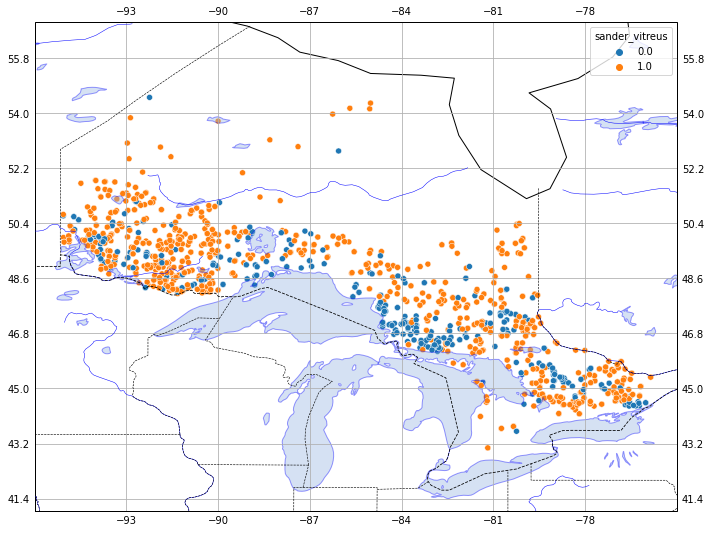

In [201]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-96, -75, 41, 57])
# ax.add_feature(land, facecolor='beige', zorder=4)
ax.add_feature(lakes, zorder=1, alpha=0.4)
ax.add_feature(rivers, linewidth=0.5, zorder=6)

ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

ax.gridlines(draw_labels=True)

sns.scatterplot(walleye.loc[walleye['year'] > 2000]['longitude'], walleye.loc[walleye['year'] > 2000]['latitude'], transform=ccrs.PlateCarree(), 
                hue=walleye.loc[walleye['year'] > 2000]['sander_vitreus'])

graph.show()

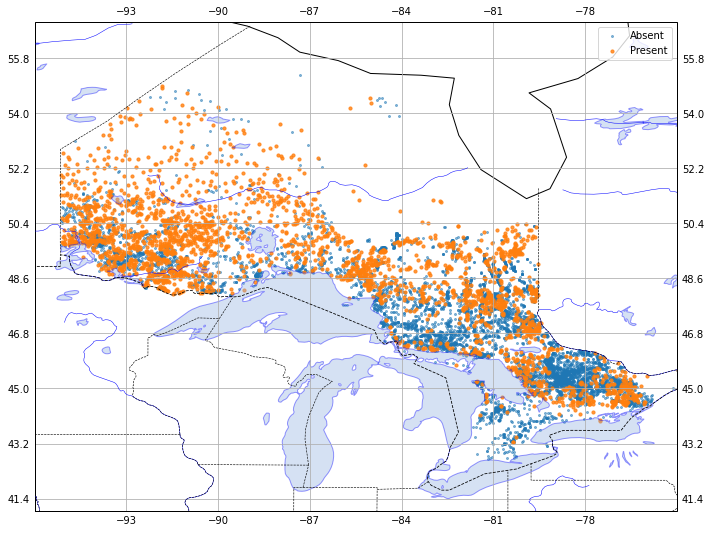

In [200]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-96, -75, 41, 57])
# ax.add_feature(land, facecolor='beige', zorder=4)
ax.add_feature(lakes, zorder=1, alpha=0.4)
ax.add_feature(rivers, linewidth=0.5, zorder=6)

ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

ax.gridlines(draw_labels=True)

graph.scatter(walleye.loc[(walleye['year'] < 2000) & (walleye['sander_vitreus'] == 0)]['longitude'], 
              walleye.loc[(walleye['year'] < 2000) & (walleye['sander_vitreus'] == 0)]['latitude'], 
              alpha = 0.5, s=4, label='Absent')
graph.scatter(walleye.loc[(walleye['year'] < 2000) & (walleye['sander_vitreus'] == 1)]['longitude'], 
              walleye.loc[(walleye['year'] < 2000) & (walleye['sander_vitreus'] == 1)]['latitude'], 
              label='Present', alpha=0.8, s=10)
graph.legend()
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


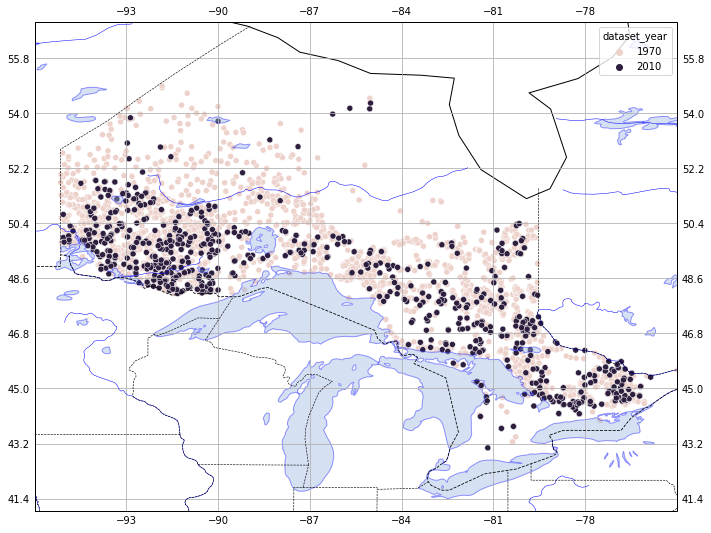

In [157]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-96, -75, 41, 57])
# ax.add_feature(land, facecolor='beige', zorder=4)
ax.add_feature(lakes, zorder=1, alpha=0.4)
ax.add_feature(rivers, linewidth=0.5, zorder=6)

ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

ax.gridlines(draw_labels=True)

sns.scatterplot(present_walleye['longitude'], present_walleye['latitude'], transform=ccrs.PlateCarree(), 
                hue=present_walleye['dataset_year'])

graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


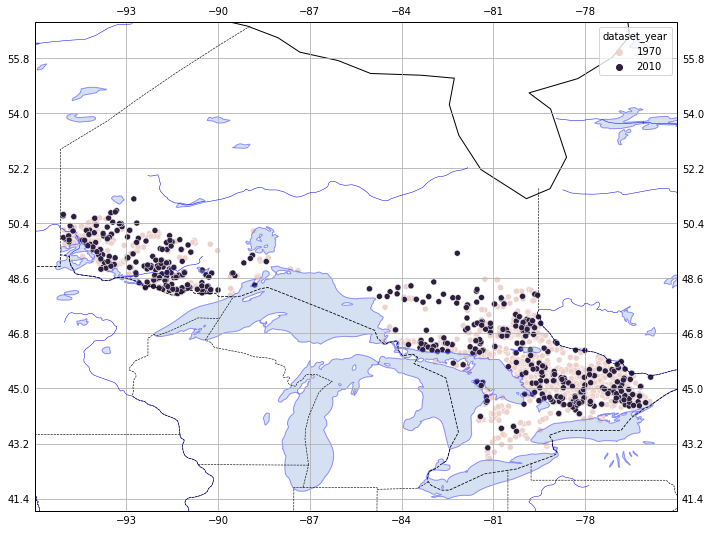

In [161]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-96, -75, 41, 57])
# ax.add_feature(land, facecolor='beige', zorder=4)
ax.add_feature(lakes, zorder=1, alpha=0.4)
ax.add_feature(rivers, linewidth=0.5, zorder=6)

ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

ax.gridlines(draw_labels=True)

sns.scatterplot(present_smallmouth['longitude'], present_smallmouth['latitude'], transform=ccrs.PlateCarree(), 
                hue=present_smallmouth['dataset_year'])

graph.show()

# 2007 Data

In [53]:
walleye_2007 = walleye.loc[walleye['year'] >= 2007]
walleye_2007['sander_vitreus'].fillna(0, inplace=True)
display(walleye_2007.head())
print(walleye_2007.columns)

/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,waterbody_name,site_description,year,lat_long,latitude,AirTemp_8110,longitude,Area_ha,conductivity,DD5_8110,...,pH_pctl,pLittoral,perimeter_(km),ph,surface_area_(ha),surface_water_temp,tds_(mg/l),secchi_depth_(m),island_perimeter_(km),sander_vitreus
9877,Balsam L.,0,2007,44.584_-78.844,44.58361,6.4,-78.84389,4764,0.0,1975,...,0,0.467848,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
9878,Greenwater L.,0,2007,48.579_-90.419,48.57917,2.4,-90.41861,3407,66.0,1453,...,38,0.115151,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
9879,White Otter L.,0,2007,49.111_-91.881,49.11111,2.8,-91.88139,8467,25.3,1615,...,40,0.140908,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
9880,Achigan L.,0,2008,46.919_-84.197,46.91861,4.0,-84.19667,290,19.8,1556,...,1,0.295243,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
9881,Addie L.,0,2008,48.166_-90.431,48.16639,2.6,-90.43111,117,60.6,1465,...,90,0.614930,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0


Index(['waterbody_name', 'site_description', 'year', 'lat_long', 'latitude',
       'AirTemp_8110', 'longitude', 'Area_ha', 'conductivity', 'DD5_8110',
       'Depth_Max', 'Depth_Mn', 'SDF', 'Secchi_Su', 'TDS (mg/L)', 'Thermo_Obs',
       'Thermo_Pred', 'TotalPhosphorus(ugL)', 'TrueColour_pctl',
       'air_temperature', 'growing_degree_days', 'lake_elevation_(m)',
       'maximum_depth_(m)', 'mean_depth', 'mei', 'o2', 'pH_pctl', 'pLittoral',
       'perimeter_(km)', 'ph', 'surface_area_(ha)', 'surface_water_temp',
       'tds_(mg/l)', 'secchi_depth_(m)', 'island_perimeter_(km)',
       'sander_vitreus'],
      dtype='object')


# Logistic regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [61]:
x_cols = ['air_temperature', 'surface_area', 'depth_mean', 'depth_max', 'conductivity', 'growing_degree', 'secchi_depth']

In [60]:
# y = df['sander_vitreus']

x = df[x_cols]
k = len(x_cols)

In [90]:
pipeline = make_pipeline(RobustScaler(), LogisticRegression())
logit_df = []

for specie in species_list:
    y = df[specie]
    print(f'Processing {specie}')
    
    for k in trange(1, len(x.columns) + 1, desc = 'Loop...'):

        #Looping over all possible combinations: from 11 choose k
        for combo in itertools.combinations(x.columns, k): 
            x_2 = x[list(combo)]

            x_train, x_test, y_train, y_test = train_test_split(x_2, y , test_size=0.2, random_state=0)

            pipeline.fit(x_train, y_train)
            y_pred = pipeline.predict_proba(x_test)
            pos_y_pred = y_pred[:, 1]
            roc_score = roc_auc_score(y_test, pos_y_pred)
            logit_df.append([len(combo), combo, roc_score])        
        
    logit_df_regular_test = pd.DataFrame(logit_df, columns=['number_features', 'features', f'{specie}_roc_score_reg_split'])
    logit_df_regular_test.sort_values(by=logit_df_regular_test.columns[-1], ascending=False, inplace=True)
#     display(logit_df_regular_test.head())
    logit_df_regular_test.to_csv(f'/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Analysis/Bulk/ontario_{specie}_logit_regular_train_test_{today_date}.csv',
                                 index=False)

Loop...:  14%|█▍        | 1/7 [00:00<00:00,  9.49it/s]

Processing sander_vitreus


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.13it/s]

Processing coregonus_artedi


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.01it/s]

Processing micropterus_dolomieu


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.07it/s]

Processing salvelinus_namaycush


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.30it/s]

Processing esox_lucius


Loop...: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


In [129]:
pipeline = make_pipeline(RobustScaler(), LogisticRegression())

for specie in species_list:
    logit_df = []
    y = df[specie]
    print(f'Processing {specie}')
    
    for k in trange(1, len(x.columns) + 1, desc = 'Loop...'):

        #Looping over all possible combinations: from 11 choose k
        for combo in itertools.combinations(x.columns, k): 
            x_2 = x[list(combo)]

            x_train, x_test, y_train, y_test = train_test_split(x_2, y , test_size=0.2, random_state=0)

            pipeline.fit(x_train, y_train)
            y_pred = pipeline.predict_proba(x_test)
            pos_y_pred = y_pred[:, 1]
            roc_score = roc_auc_score(y_test, pos_y_pred)
            logit_df.append([len(combo), combo, roc_score])        
        
    logit_df_regular_test = pd.DataFrame(logit_df, columns=['number_features', 'features', f'{specie}_roc_score_reg_split'])
    logit_df_regular_test.sort_values(by=logit_df_regular_test.columns[-1], ascending=False, inplace=True)
#     display(logit_df_regular_test.head())
    print(len(logit_df_regular_test))
    logit_df_regular_test.to_csv(f'/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Analysis/Bulk/ontario_{specie}_logit_regular_train_test_{today_date}.csv',
                                 index=False)

Loop...:  14%|█▍        | 1/7 [00:00<00:00,  7.87it/s]

Processing sander_vitreus


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.21it/s]

127
Processing coregonus_artedi


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.40it/s]

127
Processing micropterus_dolomieu


Loop...:   0%|          | 0/7 [00:00<?, ?it/s]

127
Processing salvelinus_namaycush


Loop...:   0%|          | 0/7 [00:00<?, ?it/s]

127
Processing esox_lucius


Loop...: 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

127


In [130]:
pipeline = make_pipeline(RobustScaler(), LogisticRegression())

train, test = df.loc[df['year'] < 2007], df.loc[df['year'] >= 2007]
x_train, x_test = train[x_cols], test[x_cols]
# y_train, y_test = train['sander_vitreus'], test['sander_vitreus']

for specie in species_list:
    logit_df = []

    y_train, y_test = train[specie], test[specie]
    print(f'Processing {specie}')
    
    for k in trange(1, len(x_train.columns) + 1, desc = 'Loop...'):

        #Looping over all possible combinations: from 11 choose k
        for combo in itertools.combinations(x_train.columns, k): 
            temp_x_train, temp_x_test = x_train[list(combo)], x_test[list(combo)]

            pipeline.fit(temp_x_train, y_train)
            y_pred = pipeline.predict_proba(temp_x_test)
            pos_y_pred = y_pred[:, 1]
            roc_score = roc_auc_score(y_test, pos_y_pred)
            logit_df.append([len(combo), combo, roc_score])        

    logit_df_2007_test = pd.DataFrame(logit_df, columns=['number_features', 'features', f'{specie}_roc_score_2007_split'])
    logit_df_2007_test.sort_values(by=logit_df_2007_test.columns[-1], ascending=False, inplace=True)
    logit_df_2007_test.to_csv(f'/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Analysis/Bulk/ontario_{specie}_logit_2007_test_{today_date}.csv', 
                    index=False)

Loop...:   0%|          | 0/7 [00:00<?, ?it/s]

Processing sander_vitreus


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.74it/s]

Processing coregonus_artedi


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.25it/s]

Processing micropterus_dolomieu


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.13it/s]

Processing salvelinus_namaycush


Loop...:  14%|█▍        | 1/7 [00:00<00:00,  6.77it/s]

Processing esox_lucius


Loop...: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


0.6144588195850135


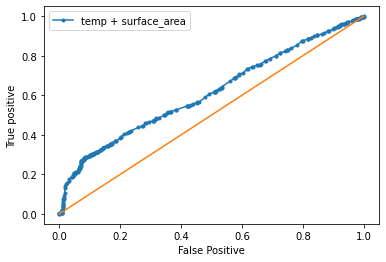

In [9]:
roc_score = roc_auc_score(y_test, pos_y_pred)
y_fpr, y_tpr, _ = roc_curve(y_test, pos_y_pred)
print(roc_score)

graph.plot(y_fpr, y_tpr, marker='.', label='temp + surface_area')
graph.plot(np.linspace(0,1,100), np.linspace(0,1,100))
graph.xlabel('False Positive')
graph.ylabel('True positive')
graph.legend()
graph.show()

In [144]:
path = '/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Analysis/Bulk/'

list_df = []

for file in os.listdir(path):
    df = pd.read_csv(f'{path}{file}')
    list_df.append(df)
    
df = pd.concat(list_df)
df = df.groupby(['features', 'number_features']).mean().reset_index()
df.to_csv(f'/mnt/c/Users/imrit/Downloads/Sharma_fish_project/Analysis/ontario_5_species_{today_date}.csv', index=False)

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
